In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

df = spark.read.csv('data/yellow/yellow_tripdata_2016-01.csv', inferSchema = 'true', header = 'true', nullValue = 'null')
df.printSchema()


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)



In [7]:
#create the rdd schema from the csv file
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
pd.set_option('display.max_colwidth', -1)

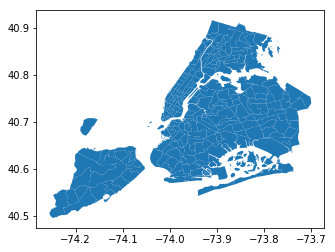

In [16]:
shapefile = gpd.read_file("data/taxi_zones/taxi_zones.shp")
#shapefile.plot()
shapefile['geometry'] = shapefile.geometry.to_crs({'init': 'epsg:4326'})
shapefile.plot()
#display(shapefile)

In [38]:
def findID(lat, long):
    geometry = [Point(xy) for xy in zip(lat, long)]
    celldf = GeoDataFrame(crs='epsg:4326', geometry=geometry)
    #print(celldf['geometry'])
    celldf

    return shapefile[shapefile['geometry'].contains(celldf['geometry'])]['LocationID']


In [47]:
lat = [-74.1844529999]
long = [40.6949959989]

a = findID(lat,long)
a[0]


1

In [5]:
sc.stop()